# U.S. Medical Insurance Costs

In [5]:
import csv
import statistics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,binom_test

In cell above I saved csv into separated lists and changed the datatypes of the columns for easier analysis in the future.
Whole number was modified to integer and decimal to float. Smoker was modified to boolean value for faster analysis.

There I saved my lists to dictionary with names of columns as keys, values are the lists.

## Goals

I would like to know how BMI affects charge, how is bmi distributed, which sex smokes more, charges for specific regions.
How is charge affected by different variable.


## Data

In [6]:
df = pd.read_csv("insurance.csv")
df["smoker"] = df["smoker"].apply(lambda x : 1 if x == "yes" else 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


## Analysis

### Distribution of charges

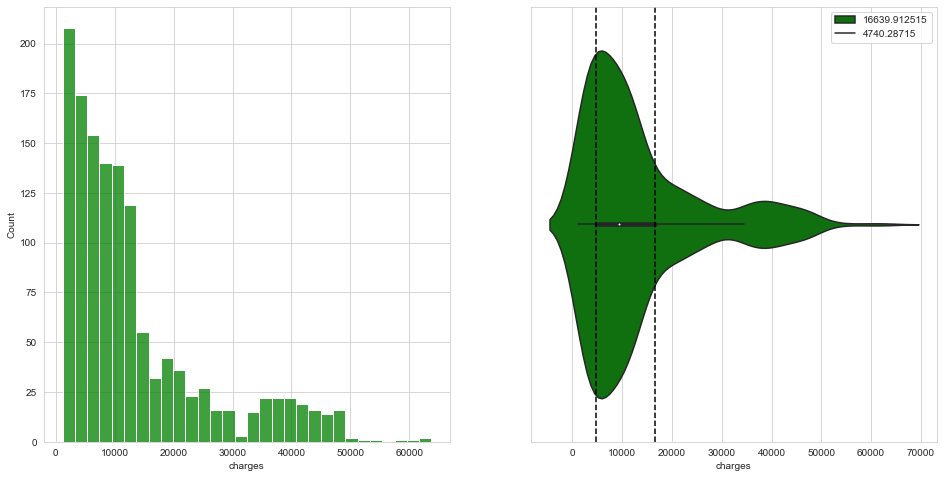

In [7]:
sns.set_style("whitegrid")
f,ax = plt.subplots(1,2,figsize = (16,8))
sns.histplot(df,x="charges",ax=ax[0],color="green")
sns.violinplot(data= df,x = "charges",ax=ax[1],color="green")
ax[1].axvline(df["charges"].quantile(0.75),label="IQR75",color="black",linestyle = "--")
ax[1].axvline(df["charges"].quantile(0.25),color="black",linestyle = "--")
ax[1].legend(labels = [df["charges"].quantile(0.75),df["charges"].quantile(0.25)])
plt.savefig("plots/Distrubtion of charges.png")
plt.show()

This distribution show us how are the charges spread in our sample. We can see that majority of population has 
insurance lower than {{round(df["charges"].quantile(0.75),1)}}.


### Distribution of BMI

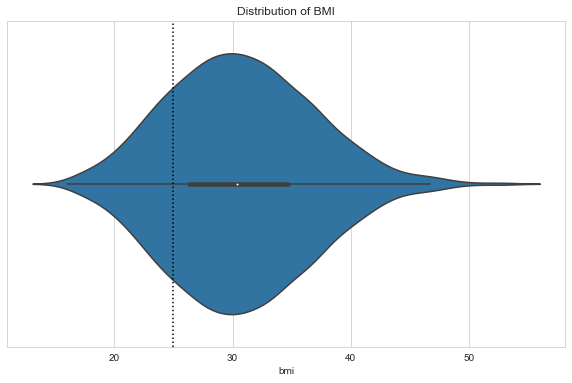

In [8]:
f,ax = plt.subplots(1,1,figsize  = (10,6))
sns.violinplot(data =df,x="bmi")
plt.title("Distribution of BMI")
plt.axvline(25,linestyle="dotted",color = "black")
plt.savefig("plots/Distribution of BMI.png")
plt.show()


In [9]:
statistics,p_value = ttest_1samp(df.bmi,25,alternative = "greater")
p_value = f"{p_value:.3e}"

There is distribution of BMI index in our sample. The healthy value is approximately 25 or lower.
This value is marked by dotted line. From the IQR can see that less 25 quartile of our sample has this value.
I would like to test my hypothesis that BMI of our people is higher than 25.<br>
My null hypothesis is:<br>
Average BMI is equal to 25.<br>
Alternative hypothesis:<br>
Average BMI higher than 25.<br>
From one sample testing we received p_value = {{p_value}}, which tells us( our threshold for significant difference was 0.05), which allows us to reject null hypothesis. People have BMI higher than 25.

### Smoking

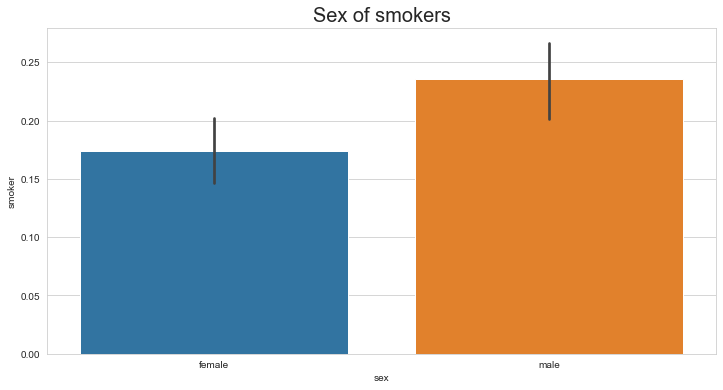

In [10]:
f,ax = plt.subplots(1,1,figsize= (12,6))
sns.barplot(data = df, x = "sex", y= "smoker")
ax.set_title("Sex of smokers",fontdict={"fontsize":20})
plt.savefig("plots/Sex of smokers")
plt.show()


In [11]:
def h_testing(pval):
    if pval < 0.05:
        print("Our null hypothesis is rejected.")
    else:
        print("Our null hypothesis is accepted.")
    print(f"This is, because our p-value is {pval:.4}")
    
        

In [12]:
from scipy.stats import chi2_contingency
xtab = pd.crosstab(df.sex,df.smoker)
chi2, pval, dof, expected = chi2_contingency(xtab)

From the bar chart we could assume that males smokes more than female. But I would rather test my hypothesis
before i get tot the conclusion. <br>
I created the cross table:<br> {{xtab}}<br>

Null hypothesis:<br> Smoking is not affected by sex.<br>
Alternate hypothesis:<br> Smoking is affected by sex.<br>
{{h_testing(pval)}}

From this test we can say that smoking is affected by sex.

### Regions

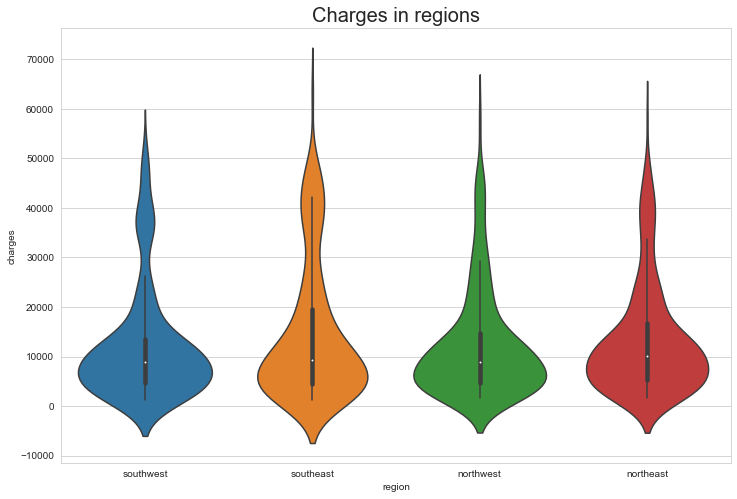

In [13]:
f,ax = plt.subplots(1,1,figsize = (12,8))
sns.violinplot(data = df,x= "region",y = "charges")
ax.set_title("Charges in regions",fontdict={"fontsize":20})
plt.savefig("plots/regions.png")
plt.show()

The biggest differences are in the range of charges primarily in the southeast, the narrowest range is in the southwest.<br>The medians are pretty similar in all regions. <br>


### BMI / Charges effect

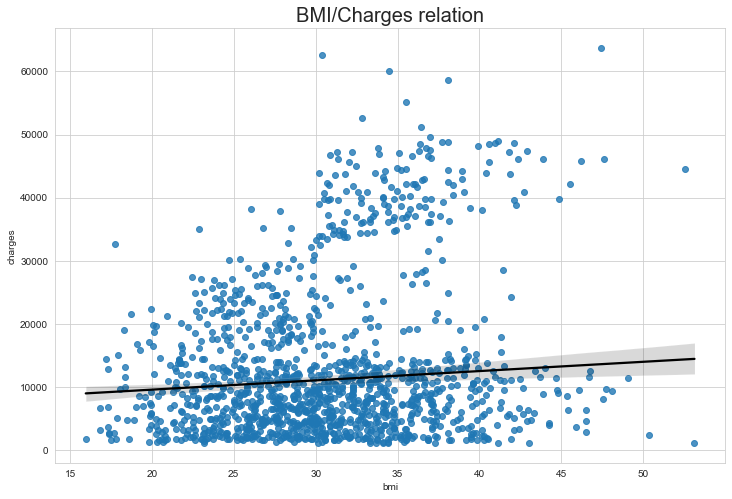

In [14]:
f,ax = plt.subplots(1,1,figsize= (12,8))
sns.regplot(data = df, x = "bmi",y= "charges",line_kws = {"color":"black"},robust=True)
ax.set_title("BMI/Charges relation",fontdict={"fontsize":20})
plt.savefig("plots/BMI_charges.png")
plt.show()

In the figure above we see scatter plot with regression line.<br>
This line describe how future charges would be affected by the bmi. <br>
In my analysis I decided to use **robust method** to eliminate effect of outliers.

### Effects of different categories

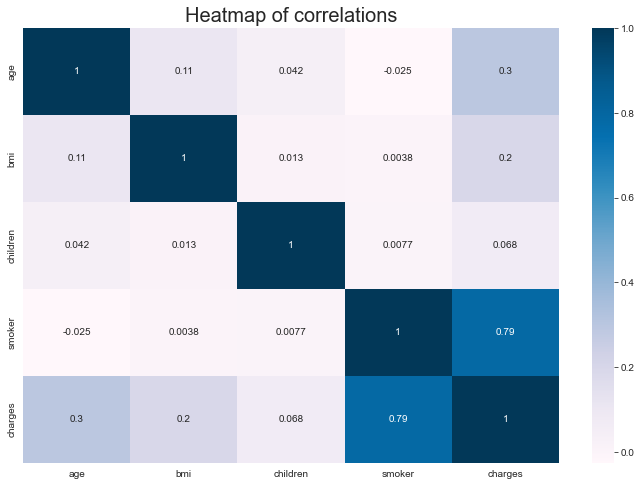

In [15]:
f,ax = plt.subplots(1,1,figsize= (12,8))
sns.heatmap(data=df.corr(),cmap= "PuBu",annot=True)
ax.set_title("Heatmap of correlations",fontdict={"fontsize":20})
plt.savefig("plots/Variables heatmap.png")
plt.show()

In the heat map we can see correlations of categories, which means how much some variable affects the other. <br>
The biggest correlation is between smoking and the charge for person.<br>This correlation is very strong.
The second biggest correlation is between charge and age of the person. <br>
Next are the bmi and the charge. These correlation probably have some significant effect, <br>
but the rest of correlation are so low, that we can't expect any effect.

